# Entrega 3

## Selección de variables

Se realiza la selección de variables por medio del método de filtrado, con el cual de las $25$ variables que pueden ser usadas como explicativas se seleccionaron $16$ variables, $8$ cuantitativas y $8$ cualitativas.
 
La selección de variables cuantitativas se realiza por medio del coeficiente de correlación de Pearson en el cual se escogieron las variables con correlación mayor a $0.58$ en valor absoluto, además se ajustó una prueba de hipótesis para cada una de estas correlaciones donde se encontró que todas son estadísticamente diferentes de cero, las relaciones de las variables seleccionadas se observan en el siguiente gráfico:


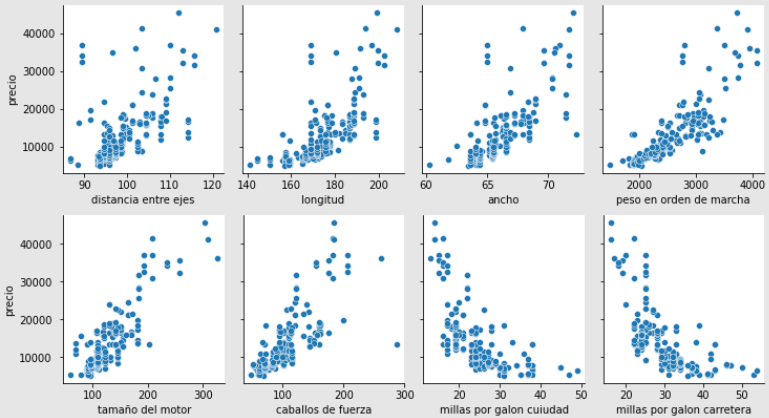

Por otra parte, para escoger las variables cualitativas se realiza la prueba ANOVA para constrastar si el precio del automovil varia según la modalidades de una variable categorica en particular, es decir, se desea constratar el siguiente sistema de hipotesis:

$$
\left\{
\begin{array}{ll}
H_{0}: &  \mu_1 = \mu_2 =\ldots=\mu_a \\
H_{1}: & \mu_i \neq \mu_j \thinspace \thinspace \forall_{i \neq j}
\end{array}
\right.
$$

Con cual, a un nivel de significancia del 5% se encontró que  8 variables categóricas tienen un efecto significativo sobre el precio del automóvil, es decir, el precio del auto varia dependiendo de la modalidad que tome una variable cualitativa, las relaciones de estas variables se muestran en el siguiente gráfico: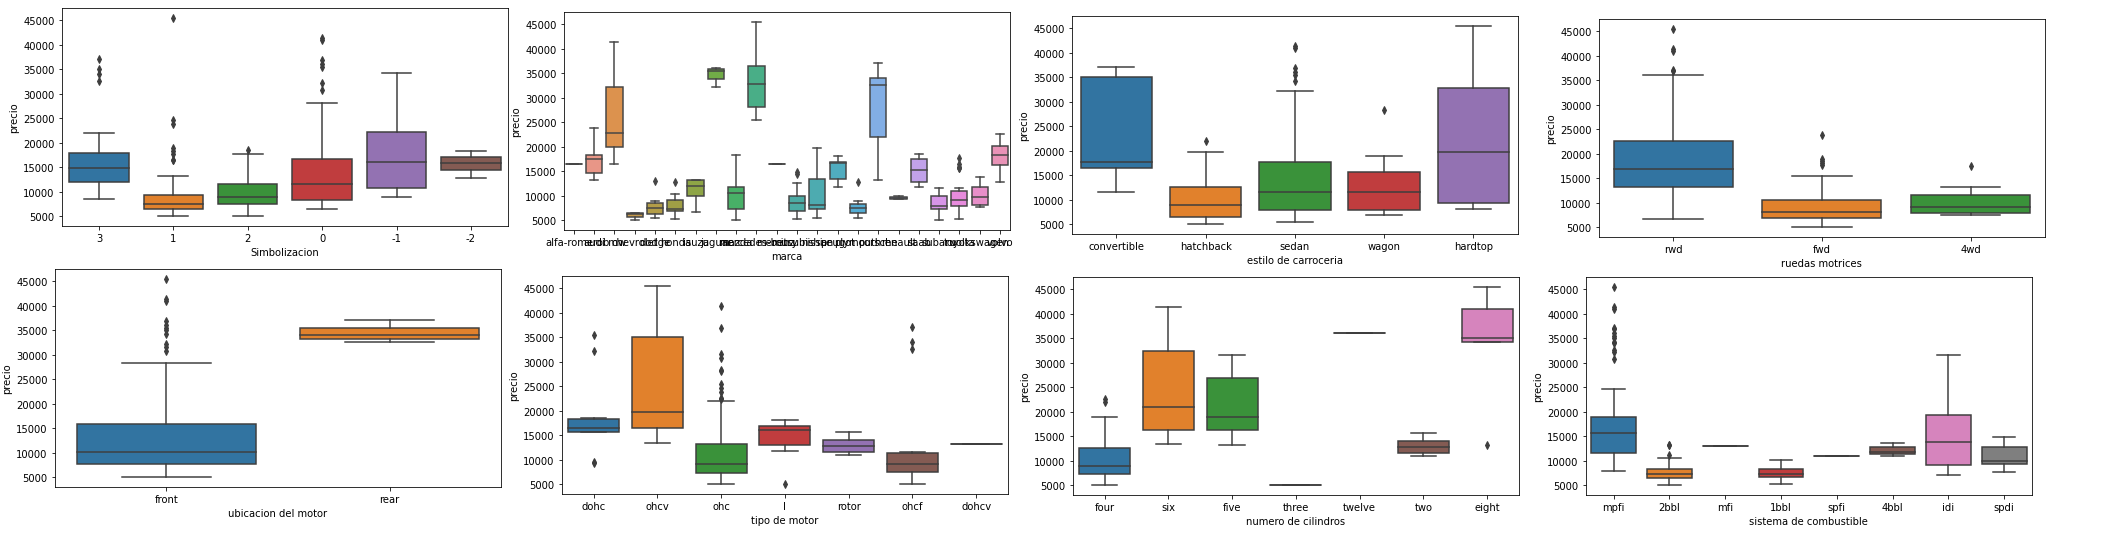

Las variables con las cuales se ajustaran los diferetes modelos son:

| Tipo | Variable |                           
|--------------------|-------------------------------- |
| Cuantitativa       |  distancia entre ejes| 
| Cuantitativa       | longitud | 
| Cuantitativa       | ancho| 
| Cuantitativa       | peso en orden de marcha | 
| Cuantitativa       |  tamaño del motor| 
| Cuantitativa       | caballos de fuerza | 
| Cuantitativa       | millas por galon cuiudad | 
| Cuantitativa       | millas por galon carretera | 
| Categórica         | Simbolizacion                           | 
| Categórica         | marca                           | 
| Categórica         | estilo de carroceria                           | 
| Categórica         | ruedas motrices                           | 
| Categórica         | ubicacion del motor    | 
| Categórica         | tipo de motor          | 
| Categórica         | numero de cilindros    | 
| Categórica         | sistema de combustible | 

# Ajuste de dos modelos

## Anexos

### Librerias

In [ ]:
!pip install altair vega_datasets
!pip install dfply
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data
from dfply import *
from sklearn.impute import KNNImputer
import pingouin as pg
from sklearn.linear_model import LinearRegression
!pip install -U -q PyDrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from scipy import stats
import seaborn as sns
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
from sklearn.svm import SVC
from sklearn import svm
from sklearn.svm import SVR

In [ ]:
Data = pd.read_excel('/content/drive/MyDrive/Classroom/Automoviles.xlsx', 
                 dtype={
                     'Simbolizacion': str
                 })

### Selección de variables

In [ ]:
Cuantitativas = Data.loc[:,['perdidas', 'distancia entre ejes',
       'longitud', 'ancho', 'altura', 'peso en orden de marcha',
        'tamaño del motor', 'diametro', 'carrera',
       'relacion de compresion', 'caballos de fuerza', 'rmp pico',
       'millas por galon cuiudad', 'millas por galon carretera', 'precio']]
Cualitativas =  Data.loc[:,['Simbolizacion', 'marca', 'tipo de combustible',
       'aspiracion', 'numero de puestas', 'estilo de carroceria',
       'ruedas motrices', 'ubicacion del motor', 'tipo de motor', 'numero de cilindros',
        'sistema de combustible']]

In [ ]:
Cuantitativas.corr()['precio'] # distancia entre ejes, longitud, ancho, peso en orden de marcha, 
                               # tamaño del motor, caballos de fuerza, millas por galon cuiudad, millas por galon carretera

perdidas                      0.133999
distancia entre ejes          0.587607
longitud                      0.683372
ancho                         0.730130
altura                        0.136123
peso en orden de marcha       0.820831
tamaño del motor              0.861753
diametro                      0.532562
carrera                       0.083115
relacion de compresion        0.071058
caballos de fuerza            0.757943
rmp pico                     -0.100833
millas por galon cuiudad     -0.668021
millas por galon carretera   -0.690937
precio                        1.000000
Name: precio, dtype: float64

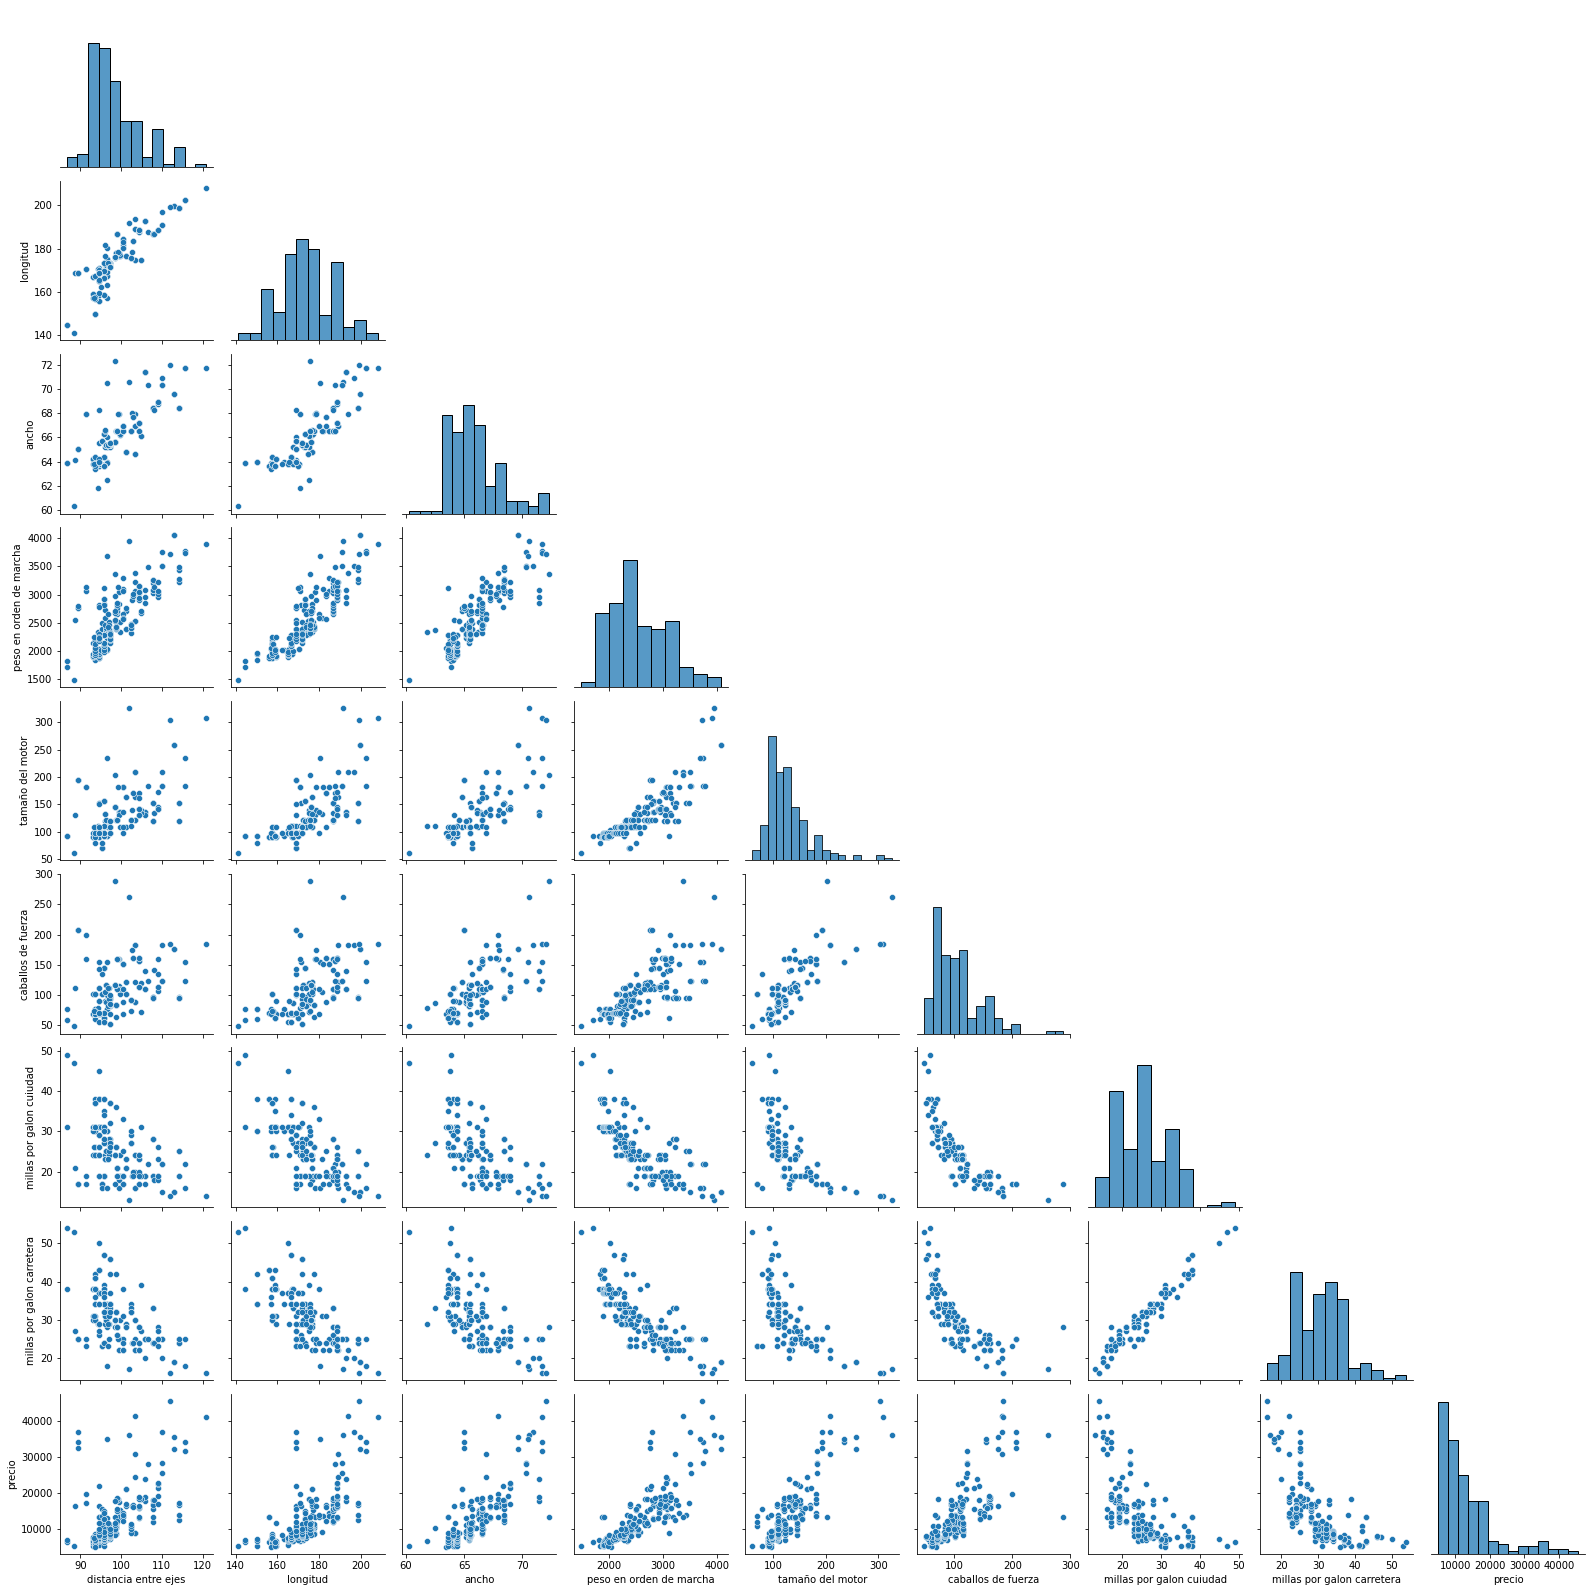

In [ ]:
sns.pairplot(Cuantitativas.loc[:,['distancia entre ejes', 'longitud', 'ancho', 'peso en orden de marcha', 
                              'tamaño del motor', 'caballos de fuerza', 'millas por galon cuiudad', 
                              'millas por galon carretera', 'precio']], diag_kind = 'hist', corner = True)

In [ ]:
Sel = ['distancia entre ejes', 'longitud', 'ancho', 'peso en orden de marcha', 
        'tamaño del motor', 'caballos de fuerza', 'millas por galon cuiudad', 
        'millas por galon carretera', 'precio']

In [ ]:
for i in Sel:
  print(pg.corr(Data[i], Data['precio'], method='pearson'))

           n         r         CI95%         p-val       BF10  power
pearson  204  0.587607  [0.49, 0.67]  2.495628e-20  2.191e+17    1.0
           n         r        CI95%         p-val      BF10  power
pearson  204  0.683372  [0.6, 0.75]  2.047947e-29  1.88e+26    1.0
           n        r         CI95%         p-val       BF10  power
pearson  204  0.73013  [0.66, 0.79]  2.992832e-35  1.058e+32    1.0
           n         r         CI95%         p-val       BF10  power
pearson  204  0.820831  [0.77, 0.86]  5.015773e-51  3.943e+47    1.0
           n         r         CI95%         p-val       BF10  power
pearson  204  0.861753  [0.82, 0.89]  1.909351e-61  7.801e+57    1.0
           n         r         CI95%         p-val       BF10  power
pearson  204  0.757943  [0.69, 0.81]  2.447348e-39  1.138e+36    1.0
           n         r           CI95%         p-val       BF10  power
pearson  204 -0.668021  [-0.74, -0.58]  9.904773e-28  4.128e+24    1.0
           n         r           CI9

In [ ]:
for i in Cualitativas.columns:
  print(pg.anova(data = Data, dv = 'precio', between = i, detailed = True ))

          Source            SS   DF            MS         F     p-unc  \
0  Simbolizacion  1.873842e+09    5  3.747685e+08  6.898062  0.000006   
1         Within  1.075725e+10  198  5.432953e+07       NaN       NaN   

        np2  
0  0.148352  
1       NaN  
   Source            SS   DF            MS          F         p-unc       np2
0   marca  9.756856e+09   21  4.646122e+08  29.419814  1.693677e-47  0.772448
1  Within  2.874234e+09  182  1.579249e+07        NaN           NaN       NaN
                Source            SS   DF            MS         F     p-unc  \
0  tipo de combustible  1.536618e+08    1  1.536618e+08  2.487667  0.116306   
1               Within  1.247743e+10  202  6.176944e+07       NaN       NaN   

        np2  
0  0.012165  
1       NaN  
       Source            SS   DF            MS         F     p-unc       np2
0  aspiracion  3.978000e+08    1  3.978000e+08  6.568601  0.011107  0.031494
1      Within  1.223329e+10  202  6.056084e+07       NaN       NaN    

In [ ]:
sel_cuali = ['Simbolizacion', 'marca', 'estilo de carroceria', 'ruedas motrices',
             'ubicacion del motor', 'tipo de motor', 'numero de cilindros',
             'sistema de combustible']

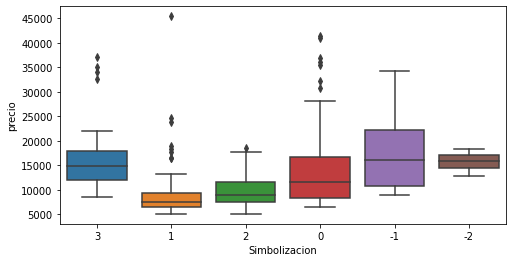

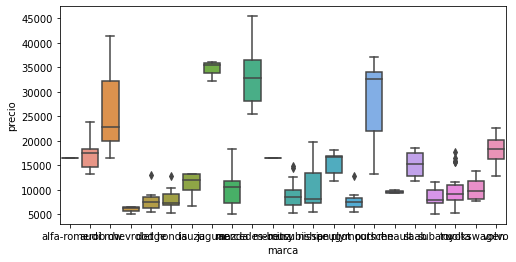

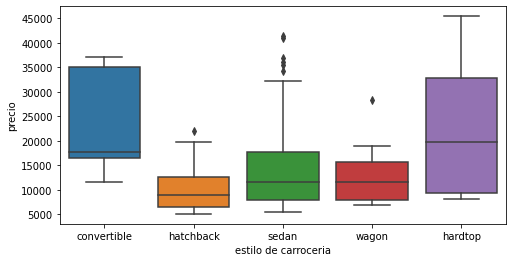

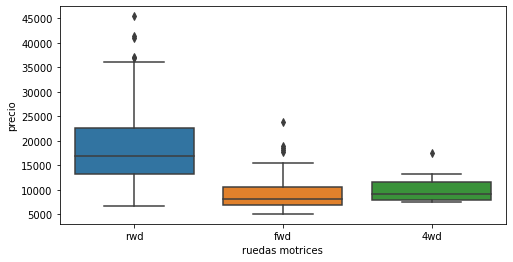

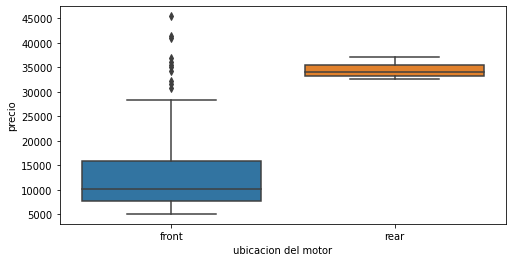

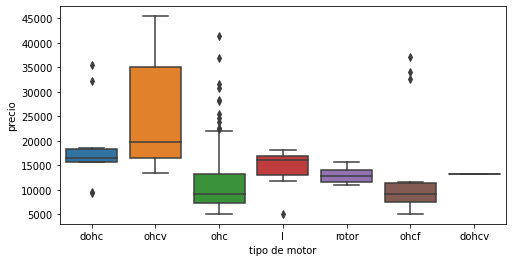

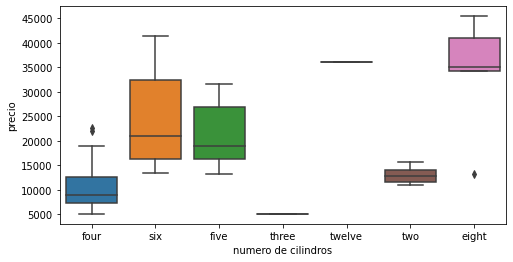

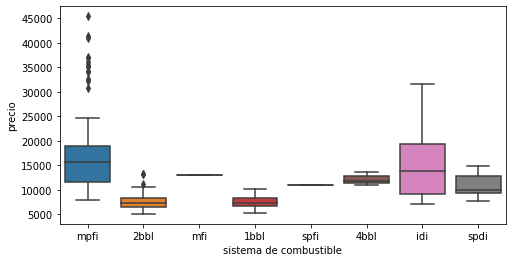

In [ ]:
for i in sel_cuali:
  fig, ax = plt.subplots(1, 1, figsize=(8, 4))
  sns.boxplot(x = i, y= 'precio', data = Data, ax=ax)

### Alistando datos

In [ ]:
y = Data['precio'].values

In [ ]:
Cuali = ['Simbolizacion', 'estilo de carroceria', 'ruedas motrices',
             'ubicacion del motor', 'tipo de motor', 'numero de cilindros',
             'sistema de combustible']

In [ ]:
Cuanti = ['distancia entre ejes', 'longitud', 'ancho', 'peso en orden de marcha', 
                              'tamaño del motor', 'caballos de fuerza', 'millas por galon cuiudad', 
                              'millas por galon carretera']

In [ ]:
Data['numero de cilindros'] = Data['numero de cilindros'].map({'two':'2-3-4','three':'2-3-4','four':'2-3-4', 'five':'5-6-8-12', 'six':'5-6-8-12', 'eight':'5-6-8-12', 'twelve':'5-6-8-12'})

In [ ]:
X = np.c_[Data[Cuanti]]

In [ ]:
Simbo_dum = pd.get_dummies(Data['Simbolizacion'])
Simbo_dum = Simbo_dum.loc[:,['0']]
estilo_dum = pd.get_dummies(Data['estilo de carroceria'])
estilo_dum = estilo_dum.loc[:,['sedan']]
ruedas_dum = pd.get_dummies(Data['ruedas motrices'])
ruedas_dum = ruedas_dum.loc[:,['fwd']]
ubicacion_dum = pd.get_dummies(Data['ubicacion del motor'])
ubicacion_dum = ubicacion_dum.loc[:,['front']]
tipo_dum = pd.get_dummies(Data['tipo de motor'])
tipo_dum = tipo_dum.loc[:,['ohc']]
cilindros_dum = pd.get_dummies(Data['numero de cilindros'])
cilindros_dum = cilindros_dum.loc[:,['2-3-4']]
sis_dum = pd.get_dummies(Data['sistema de combustible'])
sis_dum = sis_dum.loc[:,['mpfi']]

In [ ]:
X = np.c_[Data[Cuanti], Simbo_dum, estilo_dum, ruedas_dum, ubicacion_dum, tipo_dum,
          cilindros_dum, sis_dum]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### SVM

In [ ]:
parameters = {'kernel': ['rbf', 'sigmoid'], 'gamma': [1, 10, 100],'C': [1, 10, 100]}
kernel_g, C_g , gamma_g = [], [] , []
grid = pd.DataFrame()
for i in range(3):
  for j in range(3):
    for w in range(2):
      gamma_g.append(parameters['gamma'][i])
      C_g.append(parameters['C'][j])
      kernel_g.append(parameters['kernel'][w])
grid['gamma'] = gamma_g ; grid['C'] = C_g ; grid['kernel'] = kernel_g

In [ ]:
MAPE_SVR, RMSE_SVR = [], []

In [ ]:
for i in range(18):
  Modregressor = SVR(kernel = grid['kernel'][i] , gamma = grid['gamma'][i], C = grid['C'][i])
  Modregressor.fit(X_train, y_train)
  cv = KFold(n_splits=5, random_state=989, shuffle=True)
  RMSE = cross_val_score(Modregressor, X_train, y_train, cv = cv, scoring="neg_mean_squared_error", n_jobs=-1)
  MAPE = cross_val_score(Modregressor, X_train, y_train, cv = cv, scoring="neg_mean_absolute_percentage_error", n_jobs=-1)
  MAPE_SVR.append(abs(np.mean(MAPE)))
  RMSE_SVR.append(abs(np.mean(RMSE)))

In [ ]:
grid['MAPE'] = np.round_(MAPE_SVR, 4)
grid['MSE'] = np.round_(RMSE_SVR, 4)

In [ ]:
grid

,gamma,C,kernel,MAPE,MSE
0,1,1,rbf,0.3905,6.853642e+07
1,1,1,sigmoid,0.3905,6.853669e+07
2,1,10,rbf,0.3904,6.853398e+07
3,1,10,sigmoid,0.3905,6.853669e+07
4,1,100,rbf,0.3896,6.847044e+07
5,1,100,sigmoid,0.3905,6.853669e+07
6,10,1,rbf,0.3905,6.853647e+07
7,10,1,sigmoid,0.3905,6.853669e+07
8,10,10,rbf,0.3904,6.853450e+07
9,10,10,sigmoid,0.3905,6.853669e+07


In [ ]:
sorted(MAPE_SVR) # 0.38945485350254694, 100	100	rbf esteee
MAPE_SVR
Modregressor = SVR(kernel = 'rbf' , gamma = 100, C = 100)
Modregressor.fit(X_train, y_train)

In [ ]:
sorted(RMSE_SVR) # 68470442.76933481, 1	100	sigmoid
RMSE_SVR

[68536418.42049935,
 68536691.1463609,
 68533975.3186895,
 68536691.1463609,
 68470442.76933481,
 68536691.1463609,
 68536471.31950466,
 68536691.1463609,
 68534504.00848024,
 68536691.1463609,
 68483633.00598182,
 68536691.1463609,
 68536471.32571697,
 68536691.1463609,
 68534504.07060334,
 68536691.1463609,
 68483634.61453314,
 68536691.1463609]

### Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# n_estimators: ¿ Cuantos arboles se van a considerar ?
# max_features: Máximo de caracteristicas
# max_depth: Profundidad maxima de un árbol

In [ ]:
parameters = {'n_estimators': [10, 100, 300], 'max_features': [5,10,15],'max_depth': [10, 20, 30]}
n_estimators_g, max_features_g , max_depth_g = [], [] , []
grid = pd.DataFrame()
for i in range(3):
  for j in range(3):
    for w in range(3):
      n_estimators_g.append(parameters['n_estimators'][i])
      max_features_g.append(parameters['max_features'][j])
      max_depth_g.append(parameters['max_depth'][w])
grid['n_estimators'] = n_estimators_g ; grid['max_features'] = max_features_g ; grid['max_depth'] = max_depth_g

In [ ]:
MAPE_RF, RMSE_RF = [], []

In [ ]:
for i in range(27):
  Modregressor = RandomForestRegressor(n_estimators = n_estimators_g[i], max_features = max_features_g[i] , max_depth = max_depth_g[i])
  Modregressor.fit(X_train, y_train)
  cv = KFold(n_splits=5, random_state=989, shuffle=True)
  MSE = cross_val_score(Modregressor, X_train, y_train, cv = cv, scoring="neg_mean_squared_error", n_jobs=-1)
  MAPE = cross_val_score(Modregressor, X_train, y_train, cv = cv, scoring="neg_mean_absolute_percentage_error", n_jobs=-1)
  MAPE_RF.append(abs(np.mean(MAPE)))
  RMSE_RF.append(abs(np.mean(RMSE)))

In [ ]:
grid['MAPE'] = MAPE_RF
grid['MSE'] = RMSE_RF

In [ ]:
sorted(MAPE_RF) # 0.12595863803972165, 300	5	20
MAPE_RF

In [ ]:
grid

,n_estimators,max_features,max_depth,MAPE,MSE
0,10,5,10,0.144512,6.853669e+07
1,10,5,20,0.131441,6.853669e+07
2,10,5,30,0.138653,6.853669e+07
3,10,10,10,0.137745,6.853669e+07
4,10,10,20,0.141696,6.853669e+07
5,10,10,30,0.131614,6.853669e+07
6,10,15,10,0.140170,6.853669e+07
7,10,15,20,0.148784,6.853669e+07
8,10,15,30,0.142736,6.853669e+07
9,100,5,10,0.128657,6.853669e+07


### Ensamblaje manual

In [ ]:
from mlxtend.regressor import StackingRegressor
from mlxtend.data import boston_housing_data

In [ ]:
ModSVR = SVR(kernel = 'rbf' , gamma = 100, C = 100)
ModRF = RandomForestRegressor(n_estimators = 300, max_features = 5 , max_depth = 20)

In [ ]:
stregr = StackingRegressor(regressors=[ModRF], meta_regressor = ModSVR)

In [ ]:
stregr.fit(X_train, y_train)

StackingRegressor(meta_regressor=SVR(C=100, gamma=100),
                  regressors=[RandomForestRegressor(max_depth=20,
                                                    max_features=5,
                                                    n_estimators=300)])

In [ ]:
cv = KFold(n_splits=5, random_state=989, shuffle=True)
MSE_ems = cross_val_score(stregr, X_train, y_train, cv = cv, scoring="neg_mean_squared_error", n_jobs=-1)
MAPE_ems = cross_val_score(stregr, X_train, y_train, cv = cv, scoring="neg_mean_absolute_percentage_error", n_jobs=-1)

In [ ]:
abs(np.mean(MSE_ems)) , abs(np.mean(MAPE_ems))

(68451291.74774224, 0.3893595486317689)